In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Kaggle/derby/dataset/'

In [ ]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import plotly_express as px


import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install plotly_express

In [ ]:
df = pd.read_csv(path+'preprocessed.csv')
df.head()

,Unnamed: 0,track_id,race_number,program_number,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,Cluster
0,0,0.0,0.666667,0.828571,0.00,0.333333,-0.509690,0.181818,-0.513295,0.028605,-0.128961,0.028249,0.312009,1
1,297,0.0,0.500000,0.542857,0.75,0.000000,-0.239141,0.181818,-0.189828,0.109233,-0.128961,0.672316,-0.587075,1
2,572,0.5,0.750000,1.000000,0.25,0.000000,0.626613,0.090909,0.011247,0.776242,0.153722,0.237288,0.534859,1
3,845,0.5,0.416667,0.828571,0.25,0.000000,1.221820,0.181818,-0.207312,-0.000714,0.719089,0.672316,-0.092707,1
4,1125,1.0,0.166667,0.828571,1.00,0.333333,0.193736,0.181818,-0.277251,-0.741021,0.436405,0.372881,-0.138814,1


In [ ]:
df=df.drop('Unnamed: 0',axis='columns')

In [ ]:
X = df.loc[:, df.columns != 'odds'].values
y = df['odds'].values

In [ ]:
X

array([[ 0.        ,  0.66666667,  0.82857143, ..., -0.12896097,
         0.02824859,  1.        ],
       [ 0.        ,  0.5       ,  0.54285714, ..., -0.12896097,
         0.67231638,  1.        ],
       [ 0.5       ,  0.75      ,  1.        , ...,  0.15372222,
         0.23728814,  1.        ],
       ...,
       [ 0.5       ,  0.75      ,  0.74285714, ...,  0.43640541,
         0.29943503,  2.        ],
       [ 0.5       ,  0.75      ,  0.68571429, ...,  0.43640541,
         0.92090395,  2.        ],
       [ 0.        ,  0.66666667,  0.51428571, ...,  1.00177179,
         0.43502825,  1.        ]])

In [ ]:
y

array([ 0.31200878, -0.58707539,  0.5348587 , ...,  0.21979502,
        1.20084697, -0.18492093])

# PCA

Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
Smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [ ]:
from sklearn import decomposition 
pca = decomposition.PCA(0.90)
print("Shape of X before PCA -", X.shape)
X = pca.fit_transform(X)
print("Shape of X after PCA -", X.shape)

Shape of X before PCA - (15081, 12)
Shape of X after PCA - (15081, 5)


Exactly 5 features explain 90% of the variance in the dataset.

In [ ]:
fig = px.scatter(
                   x=X[:,0],
                   y=X[:,1],
                   template='simple_white',
                   color_discrete_sequence=px.colors.qualitative.G10,
                   title='PCA Scatterplot'
                 )

fig.update_layout(xaxis_title="PC1 ",yaxis_title="PC2")

fig.show()

# MLR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()
# fitting the training data
res = model.fit(X_train,y_train)

In [ ]:
y_prediction =  model.predict(X_test)
y_prediction

array([-0.25093357,  0.03594261,  1.45387183, ...,  1.4873712 ,
       -0.72966325, -0.25108805])

In [ ]:
r2 = sklearn.metrics.r2_score(y_test, y_prediction)
print(r2)

0.371377010256119


In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, y_prediction)
print(mse)

0.596461165411367


In [ ]:
mae = sklearn.metrics.mean_absolute_error(y_test, y_prediction)
print(mae)

0.554890730680269


In [ ]:
X_train.shape

(11310, 5)

In [ ]:
y_train.shape

(11310,)

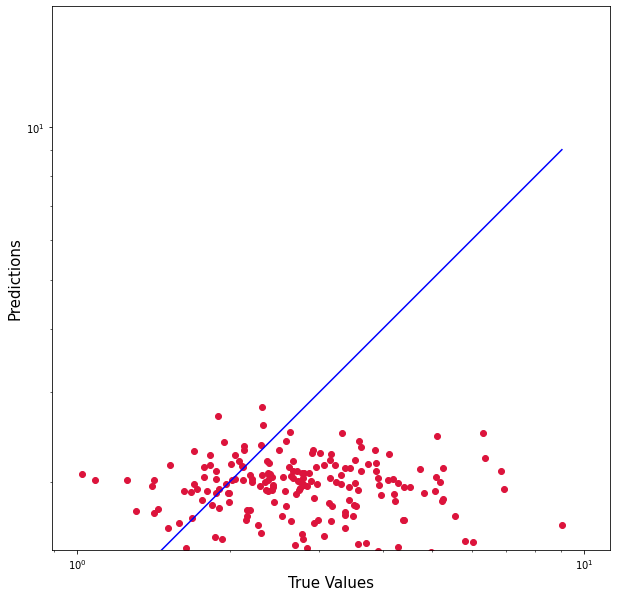

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_prediction), max(y_test))
p2 = min(min(y_prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# 5 Fold Cross Validation

In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, scoring='r2', cv=5)
scores

array([0.3630395 , 0.3757111 , 0.35140921, 0.42363919, 0.32888866])

In [ ]:
scores.mean()

0.36853752892478725

In [ ]:
scores.std()

0.031569902527625225

In [ ]:
scores_neg = cross_val_score(lm, X, y, scoring='neg_mean_squared_error', cv=5)
scores_neg

array([-0.62391139, -0.655612  , -0.57450839, -0.57809939, -0.71940056])

In [ ]:
scores_neg.mean()

-0.6303063470791668

In [ ]:
scores_neg.std()

0.05377365223231795

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006358,0.000324,0.001204,0.001385,1,{'n_features_to_select': 1},0.176547,0.181665,0.264500,0.233197,...,0.213199,0.032800,5,0.224680,0.222971,0.201241,0.210984,0.216635,0.215302,0.008543
1,0.005794,0.000676,0.000514,0.000030,2,{'n_features_to_select': 2},0.318769,0.317762,0.393011,0.357063,...,0.351957,0.029775,4,0.362848,0.362651,0.343280,0.353450,0.349146,0.354275,0.007636
2,0.004537,0.000163,0.000483,0.000014,3,{'n_features_to_select': 3},0.343491,0.331880,0.406096,0.372659,...,0.367897,0.027128,3,0.376542,0.378973,0.360011,0.369446,0.366034,0.370201,0.006913
3,0.003446,0.000097,0.000489,0.000009,4,{'n_features_to_select': 4},0.359175,0.339042,0.412302,0.381408,...,0.375934,0.025035,2,0.382728,0.387368,0.368734,0.377475,0.375629,0.378387,0.006342
4,0.002157,0.000216,0.000498,0.000022,5,{'n_features_to_select': 5},0.358540,0.338803,0.413390,0.382652,...,0.375995,0.025467,1,0.383377,0.387941,0.368904,0.377650,0.376408,0.378856,0.006472


In [ ]:
cv_results.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.004458,0.000295,0.000638,0.000292,0.311304,0.301831,0.377860,0.345396,0.348591,0.336996,0.028041,3.000000,0.346035,0.347981,0.328434,0.337801,0.336771,0.339404,0.007181
std,0.001712,0.000228,0.000317,0.000611,0.077094,0.067728,0.063886,0.063547,0.077648,0.069895,0.003246,1.581139,0.068340,0.070625,0.071864,0.071573,0.068050,0.070084,0.000914
min,0.002157,0.000097,0.000483,0.000009,0.176547,0.181665,0.264500,0.233197,0.210087,0.213199,0.025035,1.000000,0.224680,0.222971,0.201241,0.210984,0.216635,0.215302,0.006342
25%,0.003446,0.000163,0.000489,0.000014,0.318769,0.317762,0.393011,0.357063,0.373179,0.351957,0.025467,2.000000,0.362848,0.362651,0.343280,0.353450,0.349146,0.354275,0.006472
50%,0.004537,0.000216,0.000498,0.000022,0.343491,0.331880,0.406096,0.372659,0.385359,0.367897,0.027128,3.000000,0.376542,0.378973,0.360011,0.369446,0.366034,0.370201,0.006913
75%,0.005794,0.000324,0.000514,0.000030,0.358540,0.338803,0.412302,0.381408,0.386590,0.375934,0.029775,4.000000,0.382728,0.387368,0.368734,0.377475,0.375629,0.378387,0.007636
max,0.006358,0.000676,0.001204,0.001385,0.359175,0.339042,0.413390,0.382652,0.387742,0.375995,0.032800,5.000000,0.383377,0.387941,0.368904,0.377650,0.376408,0.378856,0.008543


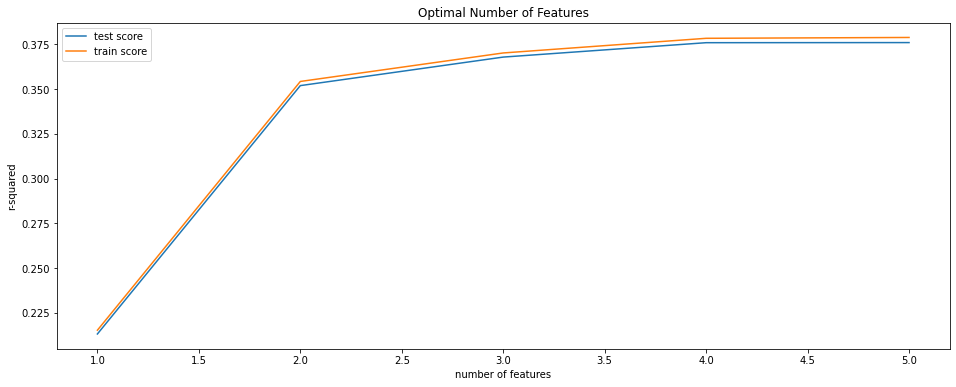

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# DL Neural Net

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(5,activation='linear',input_dim=5)) #Input layer
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 15)                90        
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import backend
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=[rmse, 'mae'])

In [ ]:
# compile the keras model
# fit the keras model on the dataset
history = model.fit(X_train,y_train,batch_size=200, epochs=200,
                    validation_data = (X_test,y_test), verbose=1)


Epoch 1/200
57/57 [==============================] - 1s 5ms/step - loss: 2.9085 - rmse: 1.0678 - mae: 1.0678 - val_loss: 1.4240 - val_rmse: 0.7600 - val_mae: 0.7600
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 2.7185 - rmse: 1.0395 - mae: 1.0395 - val_loss: 1.3361 - val_rmse: 0.7362 - val_mae: 0.7362
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 2.5516 - rmse: 1.0214 - mae: 1.0214 - val_loss: 1.2651 - val_rmse: 0.7157 - val_mae: 0.7157
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 2.5771 - rmse: 1.0089 - mae: 1.0089 - val_loss: 1.1992 - val_rmse: 0.6980 - val_mae: 0.6980
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 2.3284 - rmse: 0.9685 - mae: 0.9685 - val_loss: 1.1456 - val_rmse: 0.6835 - val_mae: 0.6835
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 2.1374 - rmse: 0.9399 - mae: 0.9399 - val_loss: 1.1063 - val_rmse: 0.6725 - val_mae: 0.6725
Epoch 7/20

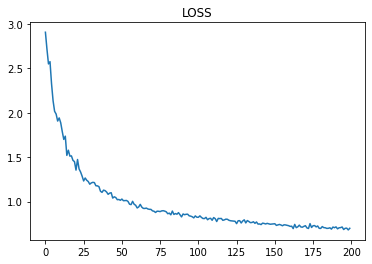

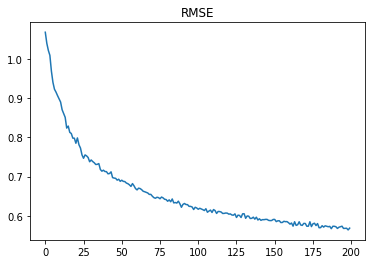

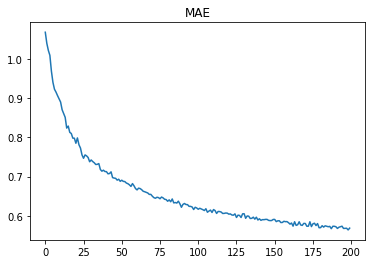

In [ ]:
# plot metrics

plt.plot(history.history['loss'])
plt.title('LOSS')
plt.show()

plt.plot(history.history['rmse'])
plt.title('RMSE')
plt.show()

plt.plot(history.history['mae'])
plt.title('MAE')
plt.show()

In [ ]:
# evaluate the keras model
a = model.evaluate(X_test, y_test)
print('Loss: ', a[0])
print('RMSE: ', a[1])
print('MAE: ', a[2])



118/118 [==============================] - 0s 1ms/step - loss: 0.6001 - rmse: 0.5282 - mae: 0.5282
Loss:  0.6000523567199707
RMSE:  0.5281573534011841
MAE:  0.5281573534011841
